In [44]:
import pandas as pd
import json
from datetime import datetime
df = pd.read_csv("./resources/business_clean.csv")

In [45]:
state_map = {}
i = 0
for index, row in df.iterrows():
    if not row.state in state_map:
        state_map[row.state] = i
        i += 1

In [46]:
df['state'] = df['state'].map(state_map, na_action='ignore')
clean = df.drop(['attributes', 'categories'], axis=1)

In [47]:
clean

,state,stars,review_count,is_open,total_hours
0,0,2.0,116,0,105.0
1,1,4.0,276,1,57.0
2,2,4.5,18,0,0.0
3,3,1.5,28,1,72.5
4,0,4.0,29,1,45.0
...,...,...,...,...,...
195,12,2.5,32,1,68.0
196,1,3.5,19,1,75.5
197,1,4.5,29,1,22.5
198,2,3.5,44,1,78.5


In [52]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

SSE = []
for i in range(3, 6):
    model = KMeans(n_clusters=i, random_state=42)
    model = model.fit(clean)
    score = model.score(clean)
    SSE.append(model.inertia_)
    #print("i:", i, " | inertia:", model.inertia_)
    

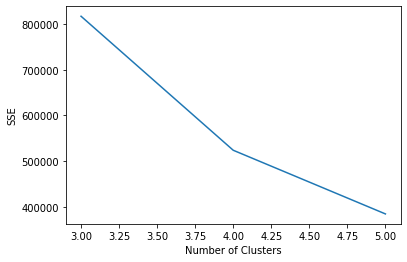

In [53]:
plt.figure()
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.plot(
    range(3, 6),
    SSE,
)
plt.show()

In [54]:
from sklearn.preprocessing import StandardScaler
stand_scaled = StandardScaler().fit_transform(clean)
stand_scaled = pd.DataFrame(stand_scaled)

In [57]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

SSE = []
for i in range(3, 6):
    model = KMeans(n_clusters=i, random_state=42)
    model = model.fit(stand_scaled)
    score = model.score(stand_scaled)
    SSE.append(model.inertia_)
    #print("i:", i, " | inertia:", model.inertia_)
    

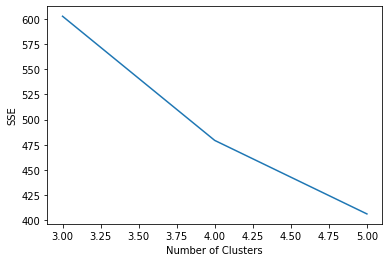

In [58]:
plt.figure()
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.plot(
    range(3, 6),
    SSE,
)
plt.show()

In [59]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaled = MinMaxScaler().fit_transform(clean)
minmax_scaled = pd.DataFrame(minmax_scaled)

In [62]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

SSE = []
for i in range(3, 6):
    model = KMeans(n_clusters=i, random_state=42)
    model = model.fit(minmax_scaled)
    score = model.score(minmax_scaled)
    SSE.append(model.inertia_)
    #print("i:", i, " | inertia:", model.inertia_)
    

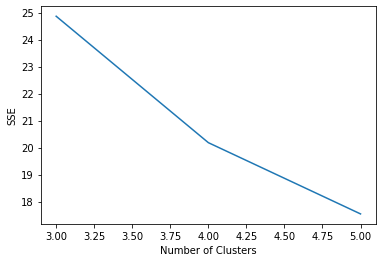

In [63]:
plt.figure()
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.plot(
    range(3, 6),
    SSE,
)
plt.show()